# Case Overview

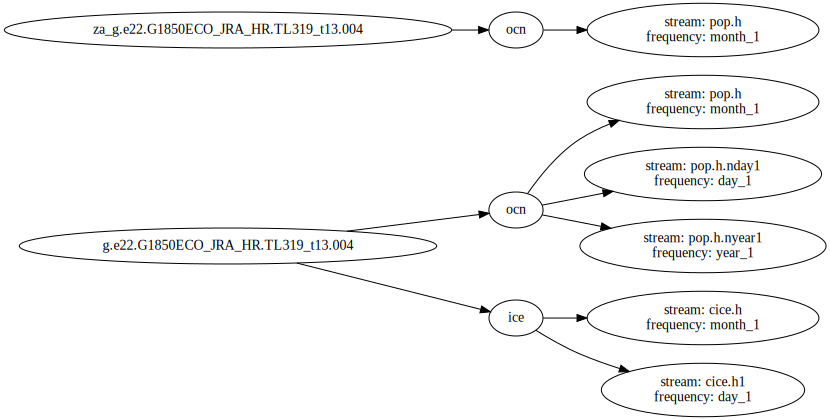

In [6]:
import pandas as pd
from graphviz import Digraph
df = pd.read_csv('../data/hires_catalog.csv')
# Create Digraph object - use the left to right orientation instead of vertical
dot = Digraph(graph_attr={'rankdir': 'LR'})

# Save the catalog as a pdf
dot.format = 'pdf'

# Start counting at one for node numbers
num_node = 1

# Loop through the different cases
for case in df.case.unique():
    case_i = num_node
    dot.node(str(case_i), label=case)
    num_node += 1

    # Loop through the different components in each case
    for component in df.loc[df.case == case].component.unique():
        comp_i = num_node
        dot.node(str(comp_i), label=component)
        dot.edge(str(case_i), str(comp_i))
        num_node += 1

        # Loop through the frequency in each component within each experiment
        for frequency in df.loc[(df.case == case) & (df.component == component)].frequency.unique():
            freq_i = num_node

            # Pull out the the stream information
            stream = df.loc[
                (df.case == case) & (df.component == component) & (df.frequency == frequency)
            ].stream.values[0]

            # Add both stream and frequency information to these bubbles
            dot.node(str(freq_i), label=f'stream: {stream} \n frequency: {frequency}')
            dot.edge(str(comp_i), str(freq_i))
            num_node += 1
        comp_i += 1
    case_i += 1
dot

In [7]:
df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path
0,ocn,pop.h,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,VVEL,0022-01,0022-12,002201-002212,Velocity in grid-y direction,centimeter/s,1.0,month_1,/glade/campaign/cesm/development/bgcwg/project...
1,ocn,pop.h,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,Jint_100m_ALK_ALT_CO2,0003-01,0003-12,000301-000312,"Alkalinity, Alternative CO2 Source Sink Term V...",meq/m^3 cm/s,1.0,month_1,/glade/campaign/cesm/development/bgcwg/project...
2,ocn,pop.h,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,POC_PROD,0011-01,0011-12,001101-001112,POC Production,mmol/m^3/s,1.0,month_1,/glade/campaign/cesm/development/bgcwg/project...
3,ocn,pop.h,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,ALK_ALT_CO2,0033-01,0033-12,003301-003312,"Alkalinity, Alternative CO2",meq/m^3,1.0,month_1,/glade/campaign/cesm/development/bgcwg/project...
4,ocn,pop.h,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,CaCO3_PROD,0029-01,0029-12,002901-002912,CaCO3 Production,mmol/m^3/s,1.0,month_1,/glade/campaign/cesm/development/bgcwg/project...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16023,ice,cice.h1,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,dvidtd_d,0029-01-01,0029-12-31,00290101-00291231,volume tendency dynamics,cm/day,1.0,day_1,/glade/campaign/cesm/development/bgcwg/project...
16024,ice,cice.h1,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,hi_d,0007-01-01,0007-12-31,00070101-00071231,grid cell mean ice thickness,m,1.0,day_1,/glade/campaign/cesm/development/bgcwg/project...
16025,ice,cice.h1,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,hi_d,0034-01-01,0034-12-31,00340101-00341231,grid cell mean ice thickness,m,1.0,day_1,/glade/campaign/cesm/development/bgcwg/project...
16026,ice,cice.h1,g.e22.G1850ECO_JRA_HR.TL319_t13.004,4.0,dvidtt_d,0034-01-01,0034-12-31,00340101-00341231,volume tendency thermo,cm/day,1.0,day_1,/glade/campaign/cesm/development/bgcwg/project...
